In [14]:
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Preparing Data

In [15]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, np.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [16]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [17]:
X = np.random.normal(loc=0,scale=1, size=10)

## Pengukuran Tendensi Sentral
***
1. Mean
2. Weighted Mean
3. Geometric Mean
4. Harmonic Mean
5. Median
6. Mode
## Mean Standard

In [18]:
mean_ = sum(x) / len(x)
mean_

8.7

In [19]:
# using statistics libraries
mean_ = statistics.mean(x)
print(mean_)

8.7


In [20]:
mean_ = statistics.mean(x_with_nan)
print(mean_)
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan
nan


In [21]:
# using numpy
mean_ = np.mean(y)
mean_

8.7

In [22]:
np.mean(X)

-0.07466058946848181

In [23]:
X.mean()

-0.07466058946848181

In [24]:
pd.Series(X).mean()

-0.07466058946848181

In [25]:
X[1] = np.nan

In [26]:
X.mean()

nan

In [27]:
pd.Series(X).mean()

-0.1209192907197745

In [29]:
X

array([-0.17764083,         nan, -0.70031873, -0.13374869, -1.36502715,
       -0.19602471,  0.68146928, -1.28799552,  1.33479632,  0.75621643])

## Weighted Mean
***
Mengalikan setiap titik data dengan bobot yang sesuai, menjumlahkannya dan membagi jumlah yang diperoleh dengan jumlah bobot. Metode ini berguna ketika kita menghitung rata-rata kumpulan data yang berisi item yang muncul dengan frekuensi relatif tertentu. Misalnya dalam himpunan data kita ada 20% data dengan nilai 2, 50% data dengan nilai 4, 30% bernilai 8. Sehingga kita bisa menghitung rata-ratanya:
0.2x2 + 0.5x4 + 0.3x8

In [30]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [31]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print(wmean)

6.95


In [32]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


## Harmonic Mean

In [33]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

In [34]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [35]:
scipy.stats.hmean(y)

2.7613412228796843

In [36]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [37]:
# manual implementation
gmean = 1

for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

In [38]:
# using scipy
scipy.stats.gmean(x)

4.67788567485604

## Median

In [39]:
statistics.median_low(x[:-1])

2.5

In [40]:
statistics.median_high(x[:-1])

4

In [41]:
X = np.random.normal(loc=0,scale=1, size=10)
X.mean()

-0.3764673047048649

In [42]:
np.quantile(X,0.5)

-0.5573239778036267

In [43]:
statistics.median(X)

-0.5573239778036267

In [44]:
np.median(X)

-0.5573239778036267

In [45]:
pd.Series(X).median()

-0.5573239778036267

## Mode

In [46]:
# menghitung modus secara manual
u = [2, 3, 2, 8, 12]

v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [47]:
X_mode = [1,2,2,3,3,3,4,4,4,4]

In [48]:
# using statistics libraries
mode_ = statistics.mode(u)
mode_

2

In [49]:
statistics.mode(X_mode)

4

In [50]:
# using scipy stats
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(v)
mode_

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\402148854.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = scipy.stats.mode(v)


ModeResult(mode=array([12]), count=array([3]))

In [51]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [52]:
mode_scipy = scipy.stats.mode(X_mode)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\1799685691.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_scipy = scipy.stats.mode(X_mode)


In [53]:
mode_scipy.mode

array([4])

In [54]:
# mode in Pandas Series, ignores nan values by default
u,v,w = pd.Series(u), pd.Series(v), pd.Series([2.8,np.nan, 2.8, 9, 12,12,12,2,2, np.nan])
w.mode()

0    12.0
dtype: float64

In [55]:
X_mode = [1,2,2,3,3,3,3,4,4,4,4]
pd.Series(X_mode).mode()

0    3
1    4
dtype: int64

## Pengukuran Variabilitas
***
1. Variance
2. Standar Deviasi (Simpangan Baku)
3. Skewness
4. Percentiles
5. Range
## Variance

In [56]:
# Menghitung variance manual
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [57]:
# using statistics 
var = statistics.variance(x)
var

123.2

In [58]:
# using numpy
var_np = np.var(np.array(x), ddof=1)
var_np

123.19999999999999

## Skewness

In [59]:
# gunakan rumus ekspresi yang lebih sederhana
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))

In [60]:
skew_ #this right tail

1.9470432273905929

In [61]:
# menghitung skew menggunakan scipy stats
scipy.stats.skew(y,bias=False)

1.9470432273905927

In [63]:
X1 = scipy.stats.skewnorm.rvs(a=10,size=10000,loc=0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\3947939701.py:1: RuntimeWarning: invalid value encountered in sqrt
  sns.displot(X1**0.5)


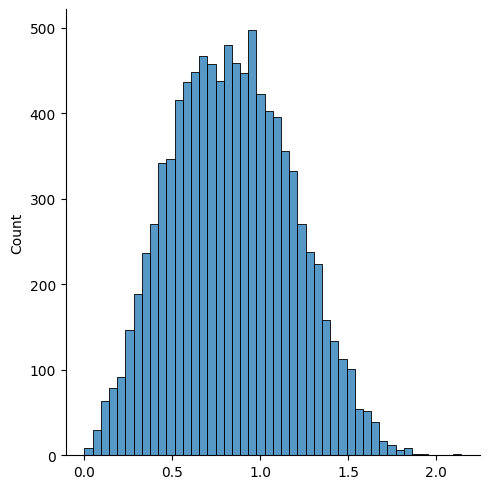

In [64]:
sns.displot(X1**0.5)

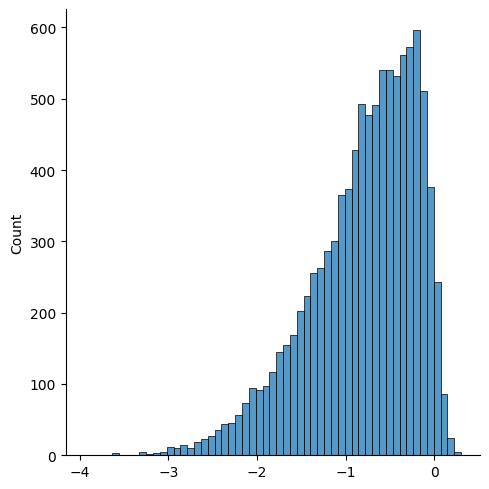

In [65]:
X2 = scipy.stats.skewnorm.rvs(a=-10,size=10000,loc=0)
sns.displot(X2)

In [66]:
scipy.stats.skew(X2)

-0.9321315993365736

In [67]:
scipy.stats.skew(X1)

0.9902607703186065

In [69]:
X1.mean()

0.7940334489017733

In [70]:
X2.mean()

-0.805496246332385

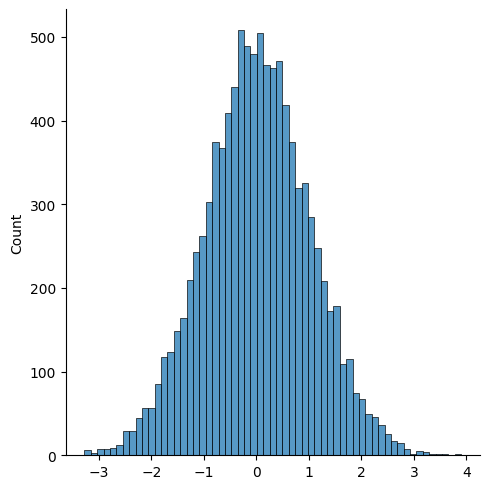

In [71]:
X = scipy.stats.skewnorm.rvs(a=0,size=10000,loc=0)
sns.displot(X)

In [72]:
scipy.stats.kurtosis(X)

0.006566180756544693

In [74]:
result = scipy.stats.describe(X, ddof=1, bias=False)

In [75]:
result

DescribeResult(nobs=10000, minmax=(-3.2730799354922455, 3.900932728455769), mean=0.01708902446388174, variance=1.0034326277824095, skewness=0.011977082095847271, kurtosis=0.007169705113257319)

In [76]:
pd.Series(X).describe()

count    10000.000000
mean         0.017089
std          1.001715
min         -3.273080
25%         -0.643187
50%          0.014103
75%          0.679678
max          3.900933
dtype: float64

## Percentiles

In [77]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [78]:
# menghitung Q2
q2 = np.percentile(x,50)

In [79]:
# menghitung persentil dengan urutan angka
percentile = np.percentile(x,[25,50,75])

NumPy juga menyertakan NaN jika ada. Untuk mengabaikan nilai nan bisa menggunakan np.nanpercentile(). NumPy juga menyediakan fungsionalitas yang mirip di quantile() dan nanquantile(). Parameter yang dilewatkan dalam quantile biasanya berkisar antara 0 - 1 dan bukannya 0 - 100

In [80]:
np.percentile(y_with_nan,[25,50,75])

array([nan, nan, nan])

In [81]:
np.nanpercentile(y_with_nan, [25,50,75])

array([2.5, 4. , 8. ])

In [82]:
np.quantile(y,0.25)

2.5

In [83]:
np.quantile(y,[0.25,0.5])

array([2.5, 4. ])

In [84]:
np.quantile(y_with_nan, 0.5)

nan

In [85]:
np.nanquantile(y_with_nan,[0.25,0.5])

array([2.5, 4. ])

## Correlation

In [86]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

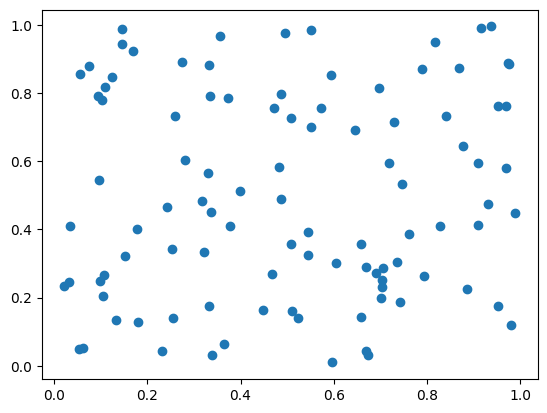

In [87]:
plt.scatter(x=X, y=Y1)

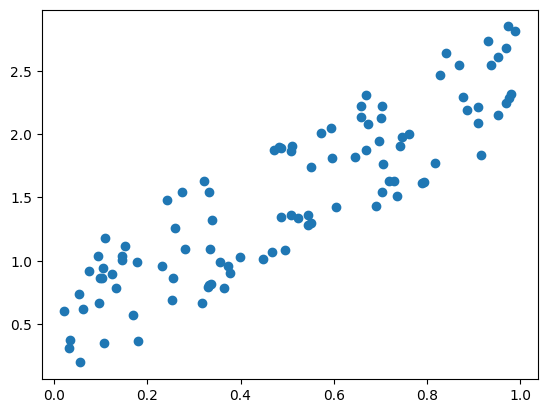

In [88]:
plt.scatter(x=X, y=Y2)

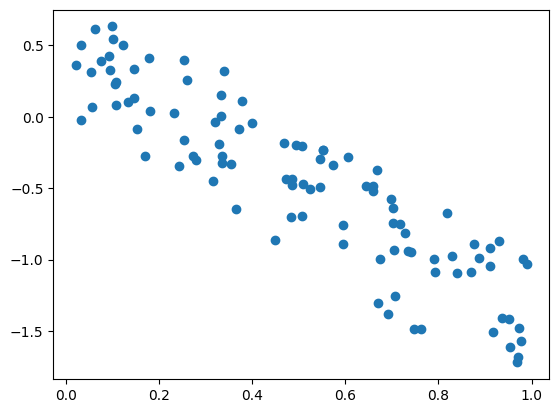

In [89]:
plt.scatter(x=X, y=Y3)

In [90]:
np.cov(X,Y1)

array([[0.0870443 , 0.00673581],
       [0.00673581, 0.08919986]])

In [91]:
np.cov(X,Y2)

array([[0.0870443 , 0.17190734],
       [0.17190734, 0.43185014]])

In [92]:
np.cov(X,Y3)[0,1]

-0.1611383439952453

In [93]:
pd.Series(X).cov(pd.Series(Y3))

-0.1611383439952453

In [94]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [95]:
np.cov(X,Y3)

array([[  8.39080938, -16.80854305],
       [-16.80854305,  33.74115796]])

In [96]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [97]:
cov_xy = np.cov(X,Y2)[0,1]

In [98]:
np.cov(X,Y2)

array([[0.07433548, 0.14377082],
       [0.14377082, 0.34798779]])

In [99]:
cov_xy / (X.std()* Y2.std())

0.902932844840039

In [100]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [101]:
cov_xy = np.cov(X,Y2)[0,1]

In [102]:
cov_xy /(X.std(ddof=1)*Y2.std(ddof=1))

0.9986431708311647

In [103]:
np.corrcoef(X,Y3)

array([[ 1.        , -0.99867811],
       [-0.99867811,  1.        ]])

In [104]:
np.corrcoef(X,Y2)[0,1]

0.9986431708311649

In [105]:
scipy.stats.linregress(X,Y2).rvalue

0.9986431708311648

## 2D

In [106]:
df = pd.DataFrame(
    {"A": X,
    "B": Y1,
    "C" : Y2
    }
)
df.head()

,A,B,C
0,8.394252,0.463040,17.779555
1,4.880269,0.502968,10.277663
2,5.918929,0.798978,12.026281
3,8.804665,0.038169,17.885969
4,6.249509,0.861926,13.293450


In [107]:
df.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,4.977614,0.533810,10.470116
std,2.835952,0.276574,5.637560
min,0.107845,0.031817,0.801724
25%,2.572714,0.345514,5.933518
50%,4.749406,0.509072,10.187828
75%,7.526287,0.802770,15.513485
max,9.978762,0.990121,20.567831


In [108]:
np.mean(df, axis=0)

A     4.977614
B     0.533810
C    10.470116
dtype: float64

In [109]:
df.median()

A     4.749406
B     0.509072
C    10.187828
dtype: float64

In [110]:
scipy.stats.gmean(df, axis=0)

array([3.81829256, 0.42717472, 8.53222452])

In [111]:
scipy.stats.hmean(df, axis=0)

array([2.02126696, 0.27663559, 6.1271143 ])

In [112]:
scipy.stats.describe(df)

DescribeResult(nobs=100, minmax=(array([0.10784485, 0.03181713, 0.80172397]), array([ 9.97876176,  0.99012095, 20.5678309 ])), mean=array([ 4.9776142 ,  0.53380993, 10.47011595]), variance=array([ 8.0426255 ,  0.07649308, 31.7820777 ]), skewness=array([ 0.08108496, -0.15189999,  0.10317891]), kurtosis=array([-1.20008519, -1.11198345, -1.19322966]))

In [113]:
df.corr()

,A,B,C
A,1.000000,-0.054969,0.998643
B,-0.054969,1.000000,-0.052362
C,0.998643,-0.052362,1.000000


<Axes: >

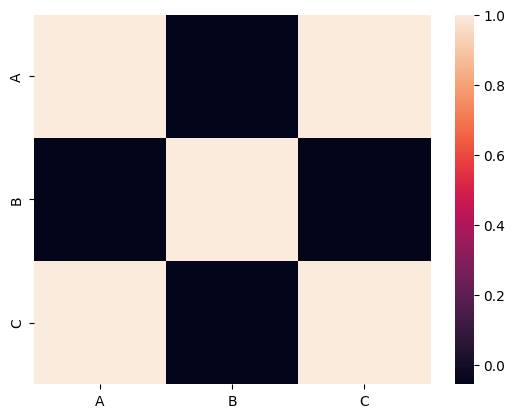

In [114]:
sns.heatmap(df.corr())